# Lab Evaluation 1: Object Detection Model for CIFAR-10

## Name: Sonal Raghuvanshi
## Student ID: 100805082

### The CIFAR-10 Dataset Description

The CIFAR-10 dataset is made up of 60,000 32 x 32 color images in 10 classes, and there are 6000 images per class. The dataset consists of 50,000 training images and 10,000 test images.

The dataset has been divided into five training batches and one test batch, each with 10,000 images. The test batch contains 1,000 randomly selected images from each class. The training batches contain the rest of the images in a random order; some training batches may contain more images from one class than another. The training batches contain 5,000 images from each class, such as shown in the following image:

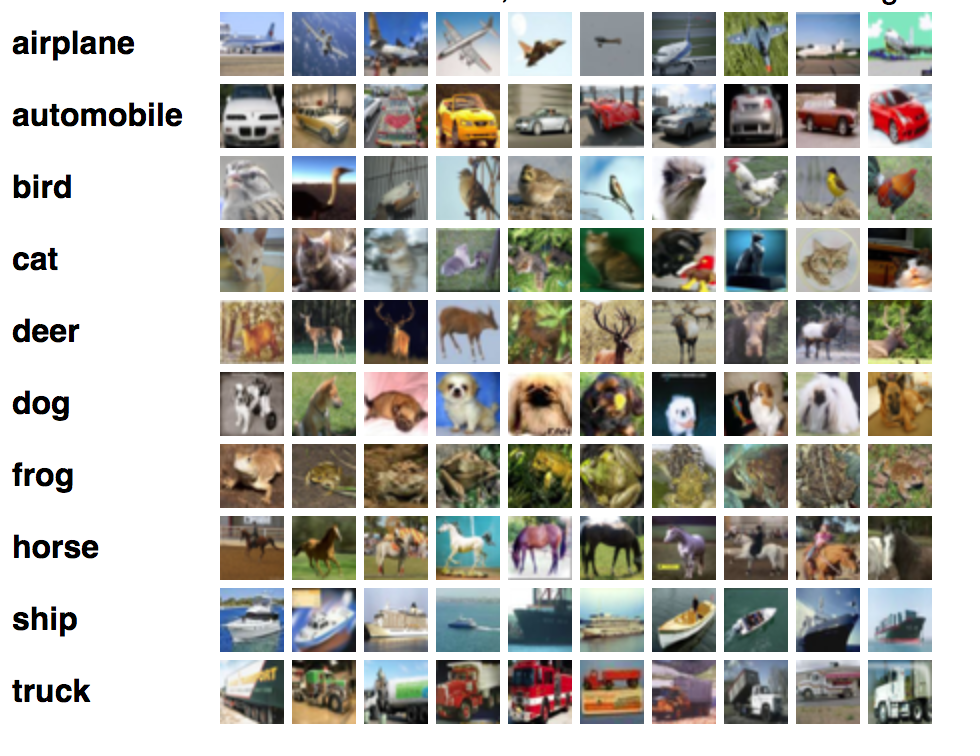

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

#### CIFAR-10 Image Classification

In [1]:
# importing the libraries
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [2]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 32, 32, 3))
	testX = testX.reshape((testX.shape[0], 32, 32, 3))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [3]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [4]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
   
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
   
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
	# save model
	model.save('final_model.h5')

In [6]:
# entry point, run the test harness
run_test_harness()

#### Model Evaluation

In [7]:
# importing the libraries
from keras.models import load_model
from keras.utils import to_categorical

In [8]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 32, 32, 3))
	testX = testX.reshape((testX.shape[0], 32, 32, 3))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [9]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [10]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# load model
	model = load_model('final_model.h5')
	# evaluate model on test dataset
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))

In [11]:
# entry point, run the test harness
run_test_harness()

> 73.220


#### Prediction for a New Image

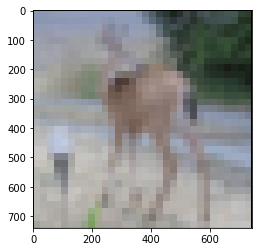

Deer


C:\Users\sonal\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [13]:
# make a prediction for a new image.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def load_image(filename):
    #load the image
    img = load_img(filename, grayscale=False, target_size=(32, 32))
    #convert to array
    img = img_to_array(img)
    #reshape into a single sample with 1 channel
    img = img.reshape(1, 32, 32, 3)
    #prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

img1 = mpimg.imread('P:/sample.png')
imgplot = plt.imshow(img1)
plt.show()
img = load_image("P:/sample.png")
model = load_model('final_model.h5')
# predict the class
result = model.predict_classes(img)
if result[0] == 0:
    print("Airplane")
elif result[0] == 1:
    print("Automobile")
elif result[0] == 2:
    print("Bird")
elif result[0] == 3:
    print("Cat")
elif result[0] == 4:
    print("Deer")
elif result[0] == 5:
    print("Dog")
elif result[0] == 6: 
    print("Frog")
elif result[0] == 7:
    print("Horse")
elif result[0] == 8:
    print("Ship")
elif result[0] == 9:
    print("Truck")
else:
    print("Not in the list")